In [8]:
import numpy as np
class Perceptron:
    """ Perceptron classifier
    Parameters:-
    
    eta - float
    learning rate ( btw 0 to 1)
    n = int
    number of iterations over the dataset
    random_state - int
    random number generator for weight initialisation 
    
    w_ - 1d array 
    weights after fitting 
    b_ - scalar 
    bias after fitting
    
    errors_ - list
    number of misclassifications in each epoch
    """
    def __init__(self,eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        """ 
        Parameters:-
        X - feature input, shape = examples, features
        Y - feature output, shape = examples"""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0,scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0 #restart the error counter from 0 in each test run
            for xi,target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_+= update * xi
                self.b_+= update
                errors+= int(update !=0.0)
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        #Calculate net input for the activation function z = wx + b
        return np.dot(X,self.w_) + self.b_
    
    def predict(self,X):
        #Calculatio prediction based on unit step activation function - min threshold value = 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

    


In [9]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("From url:",s)

df = pd.read_csv(s, header=None,encoding=' utf-8')
print(df.tail())

From url: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


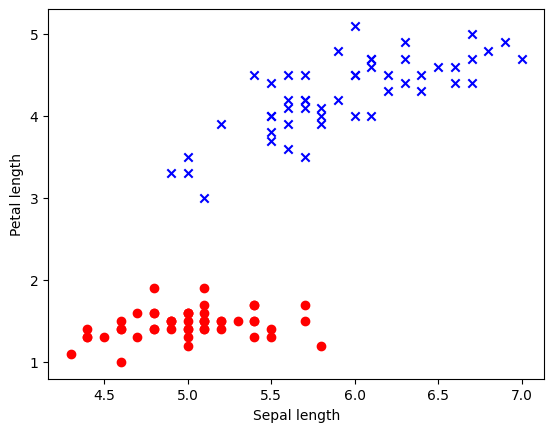

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#select flower type setosa and versicolor
y = df.iloc[0:100, 4]
y = np.where(y== 'Iris-setosa',0,1)

X = df.iloc[0:100,[0,2]].values

#plot the scatter chart
plt.scatter(X[:50,0],X[:50,1],color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue' , marker = 'x', label = 'versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()


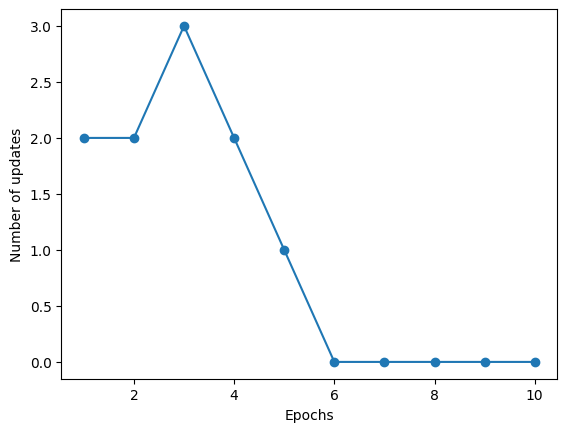

In [13]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1) , ppn.errors_, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()